# Elecciones Madrid 2021 #

## Objetivo del presente trabajo ##

El presente trabajo tiene como objetivo analizar los resultados de las pasadas elecciones del 4 de mayo en Madrid. Para ello se utlizarán los resultados electorales oficiales del siguiente enlace [https://resultados2021.comunidad.madrid/Mesas/es]. Se analizarán los resultados a nivel global de la Comunidad de Madrid, para luego pasar a un análisis más pormenorizado de la siguiente forma: Madrid Ciudad, conjunto de ciudades de relevancia y el conjunto de ciudades y pueblos fuera de los principales núcleos de población.

Se analizarán los datos en su conjunto para luego incidir en la distribución espacial del voto de los partidos que finalmente obtuvieron representación. Un análisis de la edad de la población en cada uno de los espacios (edad, nivel adquisitivo, etc) nos permitirá saber si exise un claro perfil de votante para cada uno de los partidos.

In [1]:
# leer csv:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Elecciones_Madrid_2021_Municipios.csv', delimiter=';')

In [3]:
data = data.rename(columns={"Codcir":"cpro", "Codmun":"cmun", "Municipio":"municipio"})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cpro                        179 non-null    int64  
 1   cmun                        179 non-null    int64  
 2   municipio                   179 non-null    object 
 3   Unnamed: 3                  0 non-null      float64
 4   Censo                       179 non-null    object 
 5   Certif. Alta                179 non-null    int64  
 6   Censo Total                 179 non-null    object 
 7   Votos Totales               179 non-null    object 
 8   Votos Blancos               179 non-null    float64
 9   Votos Nulos                 179 non-null    float64
 10  Abstención                  179 non-null    float64
 11  Votos Válidos               179 non-null    object 
 12  Votos Candidaturas          179 non-null    object 
 13  Cs                          179 non

In [5]:
data['municipio']=data['municipio'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cpro                        179 non-null    int64  
 1   cmun                        179 non-null    int64  
 2   municipio                   179 non-null    object 
 3   Unnamed: 3                  0 non-null      float64
 4   Censo                       179 non-null    object 
 5   Certif. Alta                179 non-null    int64  
 6   Censo Total                 179 non-null    object 
 7   Votos Totales               179 non-null    object 
 8   Votos Blancos               179 non-null    float64
 9   Votos Nulos                 179 non-null    float64
 10  Abstención                  179 non-null    float64
 11  Votos Válidos               179 non-null    object 
 12  Votos Candidaturas          179 non-null    object 
 13  Cs                          179 non

In [6]:
data.head()

,cpro,cmun,municipio,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,PCOE-PCPE,VOLT,VOX,P-LIB,POLE,MÁS MADRID,EB,UDEC,PODEMOS-IU,RECORTES CERO-PCAS-TC-GV-M
0,28,2,Ajalvir,NaN,3.251,0,3.251,2.339,10.0,15.0,...,0,0.0,340.000,1,0,330.000,1.0,1,101.000,0
1,28,3,Alameda del Valle,NaN,195,0,195,168,3.0,0.0,...,0,0.0,16.000,0,0,36.000,0.0,0,11.000,0
2,28,5,Alcalá de Henares,NaN,136.163,4,136.167,100.932,603.0,789.0,...,25,45.0,9.735,21,10,15.540,70.0,26,7.017,29
3,28,6,Alcobendas,NaN,80.401,2,80.403,62.036,297.0,363.0,...,12,36.0,5.533,24,8,8.212,60.0,44,3.430,26
4,28,7,Alcorcón,NaN,126.919,0,126.919,97.563,565.0,769.0,...,20,35.0,7.841,14,4,16.945,128.0,24,7.707,66


In [7]:
data.iloc[0]

cpro                               28
cmun                                2
municipio                     Ajalvir
Unnamed: 3                        NaN
Censo                           3.251
Certif. Alta                        0
Censo Total                     3.251
Votos Totales                   2.339
Votos Blancos                    10.0
Votos Nulos                      15.0
Abstención                      912.0
Votos Válidos                   2.324
Votos Candidaturas              2.314
Cs                               56.0
PUM+J                             0.0
PCTE                                1
FE de las JONS                      3
PH                                  1
PACMA                             4.0
3e en acción                        1
PARTIDO AUTÓNOMOS                   1
P.S.O.E.                        325.0
PP                              1.148
PCOE-PCPE                           0
VOLT                              0.0
VOX                             340.0
P-LIB       

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
municipios = 'https://raw.githubusercontent.com/FMullor/TopoJson/master/MadridMunicipios.geojson'
map_municipios = gpd.read_file(municipios)
map_municipios = map_municipios.sort_values('municipio')
map_municipios.head()

,id_0,iso,pais,id_1,communidad_,id_2,provincia,id_3,name_3,id_4,...,varname_4,ccn_4,cca_4,type_4,engtype_4,cpro,cmun,dc,codigo_post,geometry
156,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,234.0,n.a. (176),5876.0,...,None,0.0,None,Municipality,Municipality,28,002,9,28002,"MULTIPOLYGON (((-3.51150 40.53889, -3.50521 40..."
58,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,233.0,n.a. (175),5828.0,...,None,0.0,None,Municipality,Municipality,28,003,5,28003,"MULTIPOLYGON (((-3.80596 40.89047, -3.80951 40..."
86,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,234.0,n.a. (176),5877.0,...,None,0.0,None,Municipality,Municipality,28,005,3,28005,"MULTIPOLYGON (((-3.32142 40.47207, -3.32898 40..."
168,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,235.0,n.a. (177),5907.0,...,None,0.0,None,Municipality,Municipality,28,006,6,28006,"MULTIPOLYGON (((-3.67417 40.58897, -3.65981 40..."
154,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,235.0,n.a. (177),5908.0,...,None,0.0,None,Municipality,Municipality,28,007,2,28007,"MULTIPOLYGON (((-3.78781 40.35875, -3.79893 40..."


In [10]:
map_municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 182 entries, 156 to 70
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id_0         182 non-null    float64 
 1   iso          182 non-null    object  
 2   pais         182 non-null    object  
 3   id_1         182 non-null    float64 
 4   communidad_  182 non-null    object  
 5   id_2         182 non-null    float64 
 6   provincia    182 non-null    object  
 7   id_3         182 non-null    float64 
 8   name_3       182 non-null    object  
 9   id_4         182 non-null    float64 
 10  municipio    182 non-null    object  
 11  varname_4    2 non-null      object  
 12  ccn_4        182 non-null    float64 
 13  cca_4        0 non-null      object  
 14  type_4       182 non-null    object  
 15  engtype_4    182 non-null    object  
 16  cpro         164 non-null    object  
 17  cmun         164 non-null    object  
 18  dc           164 non-

In [11]:
map_municipios = map_municipios.fillna(0)
map_municipios['municipio']=map_municipios['municipio'].astype(str)
map_municipios['cpro']=map_municipios['cpro'].astype('int64')
map_municipios['cmun']=map_municipios['cmun'].astype('int64')

map_municipios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 182 entries, 156 to 70
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id_0         182 non-null    float64 
 1   iso          182 non-null    object  
 2   pais         182 non-null    object  
 3   id_1         182 non-null    float64 
 4   communidad_  182 non-null    object  
 5   id_2         182 non-null    float64 
 6   provincia    182 non-null    object  
 7   id_3         182 non-null    float64 
 8   name_3       182 non-null    object  
 9   id_4         182 non-null    float64 
 10  municipio    182 non-null    object  
 11  varname_4    182 non-null    object  
 12  ccn_4        182 non-null    float64 
 13  cca_4        182 non-null    int64   
 14  type_4       182 non-null    object  
 15  engtype_4    182 non-null    object  
 16  cpro         182 non-null    int64   
 17  cmun         182 non-null    int64   
 18  dc           182 non-

In [12]:
map_municipios.iloc[0]

id_0                                                       215.0
iso                                                          ESP
pais                                                       Spain
id_1                                                         8.0
communidad_                                  Comunidad de Madrid
id_2                                                        33.0
provincia                                                 Madrid
id_3                                                       234.0
name_3                                                n.a. (176)
id_4                                                      5876.0
municipio                                                Ajalvir
varname_4                                                      0
ccn_4                                                        0.0
cca_4                                                          0
type_4                                              Municipality
engtype_4                

In [13]:
map_municipios.iloc[-1]

id_0                                                       215.0
iso                                                          ESP
pais                                                       Spain
id_1                                                         8.0
communidad_                                  Comunidad de Madrid
id_2                                                        33.0
provincia                                                 Madrid
id_3                                                       237.0
name_3                                                n.a. (179)
id_4                                                      5987.0
municipio                                              Zarzalejo
varname_4                                                      0
ccn_4                                                        0.0
cca_4                                                          0
type_4                                              Municipality
engtype_4                

<AxesSubplot:title={'center':'Municipios Madrid'}, xlabel='Longitud', ylabel='Latitud'>

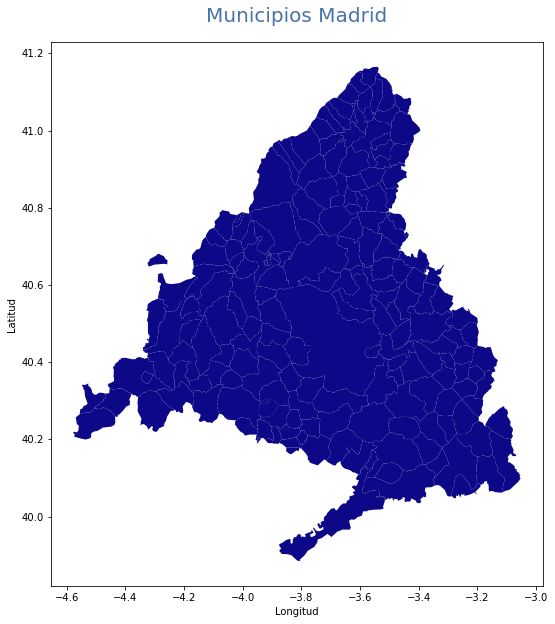

In [14]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Municipios Madrid', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
map_municipios.plot(column='id_0', cmap='plasma', ax=ax, zorder=5)

In [15]:
# pruebas elecciones
# siguiente paso: añadirle al dataframe "data" la columna 'geometry' de "map_municipios" 
# agrupando por código postal, código de municipio, etc

# pasamos a numeric columnas de los datasets:
data['cpro'] = pd.to_numeric(data['cpro'])

map_municipios['cpro'] = pd.to_numeric(map_municipios['cpro'])
map_municipios['cmun'] = pd.to_numeric(map_municipios['cmun'])

#pruebas: cogemos cervera de buitrago en ambos datasets y juntamos la info.

# cervera_data = data[data['Codcir'] == '28']
# cervera_data = data[data['Municipio'] == 'Cervera de Buitrago']
# cervera_data

In [16]:
map_municipios.head()

,id_0,iso,pais,id_1,communidad_,id_2,provincia,id_3,name_3,id_4,...,varname_4,ccn_4,cca_4,type_4,engtype_4,cpro,cmun,dc,codigo_post,geometry
156,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,234.0,n.a. (176),5876.0,...,0,0.0,0,Municipality,Municipality,28,2,9,28002,"MULTIPOLYGON (((-3.51150 40.53889, -3.50521 40..."
58,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,233.0,n.a. (175),5828.0,...,0,0.0,0,Municipality,Municipality,28,3,5,28003,"MULTIPOLYGON (((-3.80596 40.89047, -3.80951 40..."
86,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,234.0,n.a. (176),5877.0,...,0,0.0,0,Municipality,Municipality,28,5,3,28005,"MULTIPOLYGON (((-3.32142 40.47207, -3.32898 40..."
168,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,235.0,n.a. (177),5907.0,...,0,0.0,0,Municipality,Municipality,28,6,6,28006,"MULTIPOLYGON (((-3.67417 40.58897, -3.65981 40..."
154,215.0,ESP,Spain,8.0,Comunidad de Madrid,33.0,Madrid,235.0,n.a. (177),5908.0,...,0,0.0,0,Municipality,Municipality,28,7,2,28007,"MULTIPOLYGON (((-3.78781 40.35875, -3.79893 40..."


In [17]:
len(data)

179

In [18]:
len(map_municipios)

182

In [19]:
# sale ok, pero con len(result)=163
# result = data.merge(map_municipios, on=['cpro', 'cmun'])

# sale ok, pero con len(result)=182
# result = pd.merge(data, map_municipios, left_index=True , right_index=True, how='outer')

# sale ok, pero con len(result)=179  ----> después falla a la hora de representar el mapa, no sé por qué
result = pd.merge(data, map_municipios, how='inner', on=["cpro", "cmun"])

# como en el ejemplo de maps:
# result = map_municipios.merge(data, left_on="cpro", right_on="cmun", how="inner")

data['municipio'] = data['municipio'].str.title()
data['municipio'] = data['municipio'].str.strip()
map_municipios['municipio'] = map_municipios['municipio'].str.title()
map_municipios['municipio'] = map_municipios['municipio'].str.strip()

# result = map_municipios.merge(data, left_on="cpro", right_on="cmun", how="inner")
# result = data.merge(map_municipios, left_on="municipio", right_on="cmun", how="inner")

# sale ok, pero con len(result)=179
# result = pd.merge(data, map_municipios, left_index=True , right_index=True, how='inner')

In [20]:
result.iloc[-1]

cpro                                                                         28
cmun                                                                        183
municipio_x                                                           Zarzalejo
Unnamed: 3                                                                  NaN
Censo                                                                     1.219
Certif. Alta                                                                  0
Censo Total                                                               1.219
Votos Totales                                                               879
Votos Blancos                                                               2.0
Votos Nulos                                                                 9.0
Abstención                                                                340.0
Votos Válidos                                                               870
Votos Candidaturas                      

In [21]:
len(result)

163

In [22]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   cpro                        163 non-null    int64   
 1   cmun                        163 non-null    int64   
 2   municipio_x                 163 non-null    object  
 3   Unnamed: 3                  0 non-null      float64 
 4   Censo                       163 non-null    object  
 5   Certif. Alta                163 non-null    int64   
 6   Censo Total                 163 non-null    object  
 7   Votos Totales               163 non-null    object  
 8   Votos Blancos               163 non-null    float64 
 9   Votos Nulos                 163 non-null    float64 
 10  Abstención                  163 non-null    float64 
 11  Votos Válidos               163 non-null    object  
 12  Votos Candidaturas          163 non-null    object  
 13  Cs                  

In [23]:
# clean columns no needed
result.drop(columns=[
                'geometry_x', 'id_0', 'iso', 'pais', 'id_1', 'communidad_', 'id_2', 'provincia', 
                'id_3', 'name_3', 'id_4', 'municipio_y', 'varname_4', 'ccn_4', 'cca_4', 'type_4', 'engtype_4', 
                ]
           )

result.rename(columns={'geometry_y':'geometry'}, inplace=True)

KeyError: "['geometry_x'] not found in axis"

In [24]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   cpro                        163 non-null    int64   
 1   cmun                        163 non-null    int64   
 2   municipio_x                 163 non-null    object  
 3   Unnamed: 3                  0 non-null      float64 
 4   Censo                       163 non-null    object  
 5   Certif. Alta                163 non-null    int64   
 6   Censo Total                 163 non-null    object  
 7   Votos Totales               163 non-null    object  
 8   Votos Blancos               163 non-null    float64 
 9   Votos Nulos                 163 non-null    float64 
 10  Abstención                  163 non-null    float64 
 11  Votos Válidos               163 non-null    object  
 12  Votos Candidaturas          163 non-null    object  
 13  Cs                  

In [25]:
# data['municipio'] = map_municipios['municipios']

#data['cpro'] = map_municipios['cpro']
#data['cmun'] = map_municipios['cmun']

# data['geometry'] = np.where(
    #(data['municipio'].equals(map_municipios['municipios'])) & 
#    (data['cpro'].equals(map_municipios['cpro'])) & 
#    (data['cmun'].equals(map_municipios['cmun'])), 
#    map_municipios['geometry'], 0
#)

In [26]:
#data['geometry'] = pd.Series(np.where(
#    (data['cpro'].equals(map_municipios['cpro'])) & 
#    (data['cmun'].equals(map_municipios['cmun'])), 
#    map_municipios['geometry'], 0
#))

In [27]:
data.head()

,cpro,cmun,municipio,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,PCOE-PCPE,VOLT,VOX,P-LIB,POLE,MÁS MADRID,EB,UDEC,PODEMOS-IU,RECORTES CERO-PCAS-TC-GV-M
0,28,2,Ajalvir,NaN,3.251,0,3.251,2.339,10.0,15.0,...,0,0.0,340.000,1,0,330.000,1.0,1,101.000,0
1,28,3,Alameda Del Valle,NaN,195,0,195,168,3.0,0.0,...,0,0.0,16.000,0,0,36.000,0.0,0,11.000,0
2,28,5,Alcalá De Henares,NaN,136.163,4,136.167,100.932,603.0,789.0,...,25,45.0,9.735,21,10,15.540,70.0,26,7.017,29
3,28,6,Alcobendas,NaN,80.401,2,80.403,62.036,297.0,363.0,...,12,36.0,5.533,24,8,8.212,60.0,44,3.430,26
4,28,7,Alcorcón,NaN,126.919,0,126.919,97.563,565.0,769.0,...,20,35.0,7.841,14,4,16.945,128.0,24,7.707,66


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cpro                        179 non-null    int64  
 1   cmun                        179 non-null    int64  
 2   municipio                   179 non-null    object 
 3   Unnamed: 3                  0 non-null      float64
 4   Censo                       179 non-null    object 
 5   Certif. Alta                179 non-null    int64  
 6   Censo Total                 179 non-null    object 
 7   Votos Totales               179 non-null    object 
 8   Votos Blancos               179 non-null    float64
 9   Votos Nulos                 179 non-null    float64
 10  Abstención                  179 non-null    float64
 11  Votos Válidos               179 non-null    object 
 12  Votos Candidaturas          179 non-null    object 
 13  Cs                          179 non

In [29]:
data['geometry'] = map_municipios['geometry']

In [30]:
from geopandas import GeoDataFrame
data = GeoDataFrame(data)

# result = GeoDataFrame(result)

In [31]:
result.head()

,cpro,cmun,municipio_x,Unnamed: 3,Censo,Certif. Alta,Censo Total,Votos Totales,Votos Blancos,Votos Nulos,...,id_4,municipio_y,varname_4,ccn_4,cca_4,type_4,engtype_4,dc,codigo_post,geometry
0,28,2,Ajalvir,NaN,3.251,0,3.251,2.339,10.0,15.0,...,5876.0,Ajalvir,0,0.0,0,Municipality,Municipality,9,28002,"MULTIPOLYGON (((-3.51150 40.53889, -3.50521 40..."
1,28,3,Alameda del Valle,NaN,195,0,195,168,3.0,0.0,...,5828.0,Alameda del Valle,0,0.0,0,Municipality,Municipality,5,28003,"MULTIPOLYGON (((-3.80596 40.89047, -3.80951 40..."
2,28,5,Alcalá de Henares,NaN,136.163,4,136.167,100.932,603.0,789.0,...,5877.0,AlcalÃ¡ de Henares,0,0.0,0,Municipality,Municipality,3,28005,"MULTIPOLYGON (((-3.32142 40.47207, -3.32898 40..."
3,28,6,Alcobendas,NaN,80.401,2,80.403,62.036,297.0,363.0,...,5907.0,Alcobendas,0,0.0,0,Municipality,Municipality,6,28006,"MULTIPOLYGON (((-3.67417 40.58897, -3.65981 40..."
4,28,7,Alcorcón,NaN,126.919,0,126.919,97.563,565.0,769.0,...,5908.0,AlcorcÃ³n,0,0.0,0,Municipality,Municipality,2,28007,"MULTIPOLYGON (((-3.78781 40.35875, -3.79893 40..."


<AxesSubplot:title={'center':'Municipios Madrid'}, xlabel='Longitud', ylabel='Latitud'>

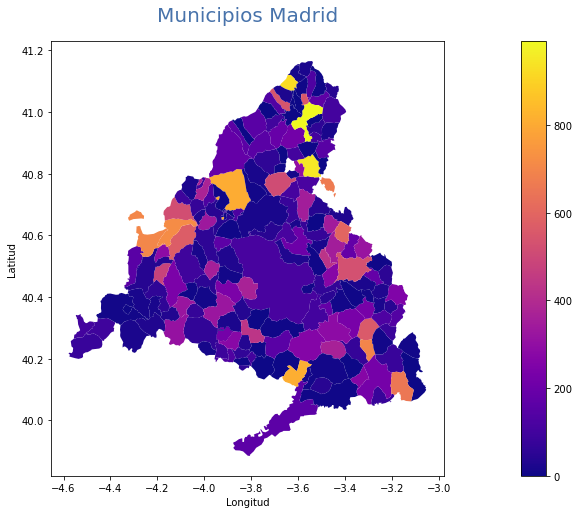

In [32]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Municipios Madrid', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Mostrar el mapa finalizado
data.plot(column='PODEMOS-IU', cmap='plasma',legend=True, cax=cax, ax=ax, zorder=5)

In [33]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/FMullor/TopoJson/master/MadridMunicipios.geojson') as response:
    municipalities = json.load(response)

import plotly.express as px

fig = px.choropleth_mapbox( 
                           result
                           geojson=municipalities, 
                           locations='Municipio', 
                           color='PP',
                           featureidkey="properties.municipios",
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, 
                           center = {"lat": 40.6, "lon": -3.8},
                           opacity=0.5,
                           labels={'PP':'PP'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

SyntaxError: invalid syntax (<ipython-input-33-70ff08273b56>, line 10)

In [34]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json


#Convert data to geojson for bokeh
wi_geojson=GeoJSONDataSource(geojson=data.to_json())

#wi_geojson=GeoJSONDataSource(geojson=result.to_json())

#wi_geojson=GeoJSONDataSource(geojson=map_municipios.to_json())

Loading BokehJS ...

In [35]:
color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 0, high = 1)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('municipio_x','@municipio_x'),('PP', '@PP'),
                               ('P.S.O.E.','@P.S.O.E.'),
                               ('Votos Totales','@Votos Totales')])
p = figure(title="Elecciones Madrid 2021", tools=[hover])
p.patches("xs","ys",source=wi_geojson,
          fill_color = {'field' :'PP', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

In [36]:
# map_municipios
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json


#Convert data to geojson for bokeh
# wi_geojson=GeoJSONDataSource(geojson=data.to_json())
# wi_geojson=GeoJSONDataSource(geojson=result.to_json())

wi_geojson=GeoJSONDataSource(geojson=map_municipios.to_json())

color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 0, high = 1)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('municipio','@municipio'),('PP', '@PP'),
                               ('P.S.O.E.','@P.S.O.E.'),
                               ('Votos Totales','@Votos Totales')])
p = figure(title="Elecciones Madrid 2021", tools=[hover])
p.patches("xs","ys",source=wi_geojson,
          fill_color = {'field' :'PP', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

Loading BokehJS ...

In [37]:
# result
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json


#Convert data to geojson for bokeh
# wi_geojson=GeoJSONDataSource(geojson=data.to_json())
# wi_geojson=GeoJSONDataSource(geojson=result.to_json())

result = GeoDataFrame(result)
wi_geojson=GeoJSONDataSource(geojson=result.to_json())

color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 0, high = 1)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('municipio_x','@municipio_x'),('PP', '@PP'),
                               ('P.S.O.E.','@P.S.O.E.'),
                               ('Votos Totales','@Votos Totales')])
p = figure(title="Elecciones Madrid 2021", tools=[hover])
p.patches("xs","ys",source=wi_geojson,
          fill_color = {'field' :'PP', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

Loading BokehJS ...

In [38]:
result[result['municipio_x']=='Madrid']['PP']

69    807.189
Name: PP, dtype: float64

In [39]:
data[data['municipio']=='Madrid']['PP']

84    807.189
Name: PP, dtype: float64